# Final exam

You are not allowed to comminicate via any means with anybody during the exam. Your solutions go into a separate directory called `finalexam` on your repository.

## Problem 1

**Part 1:**

1. Generate a normal (Gaussian) distribition of a sample size of 10000 with a mean of 2.5 and a standard deviation of 0.5.
2. Make a histogram plot of the distribution with 7 bins.

In [39]:
%pylab nbagg

dist = random.normal(2.5,.5,10000) #this numpy function generates random numbers in a gaussian

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


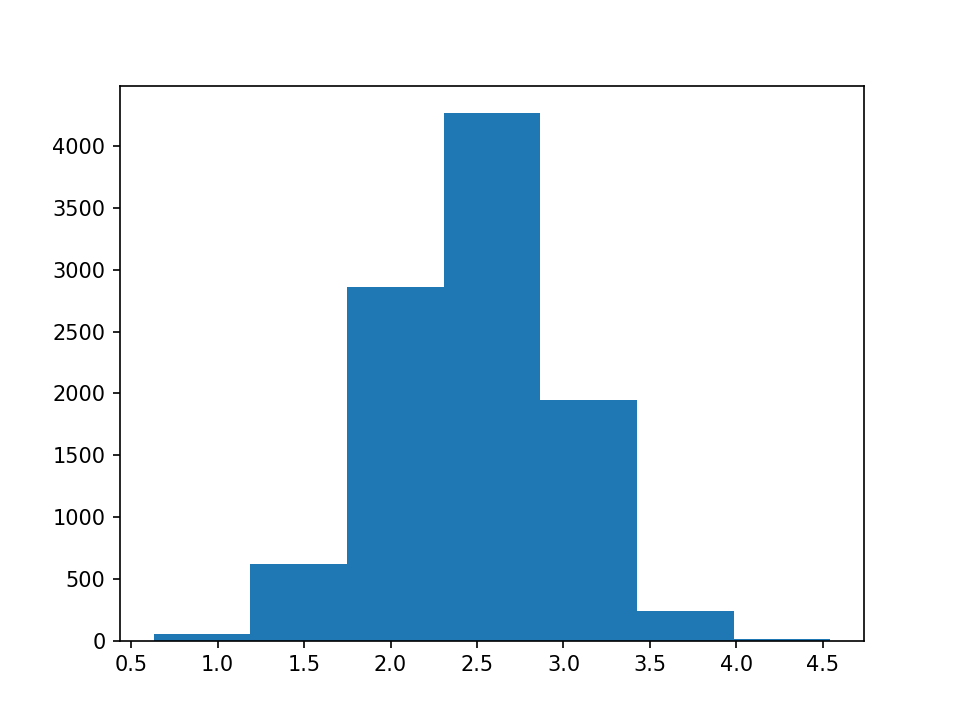

(array([   51.,   620.,  2857.,  4268.,  1947.,   241.,    16.]),
 array([ 0.63136953,  1.19005749,  1.74874544,  2.3074334 ,  2.86612136,
         3.42480932,  3.98349728,  4.54218523]),
 <a list of 7 Patch objects>)

In [40]:
figure(1)
hist(dist, bins=7)

**Part 2:**
1. Make a plot of the function $$f(x) = 10 sin(x) + 0.1 x^2 + 1$$ in the range $[-2.,20]$. Use 200 data points for the plot.
2. Create noisy data out of the function $f(x)$ by replacing each value $f(x)$ by a random number drawn from a normal (Gaussian) distribution with mean $f(x)$ and standard deviation $3$. **Or:** Read this data from the file `data.txt`. Make a plot of that data set. 
3. Print out and add to the plot a red dot at the coordinates that correspond to the averages of the x and y coordinates of all points that are located in a box defined by $18 < y < 50$  and $7 < x < 14$. 

<IPython.core.display.Javascript object>


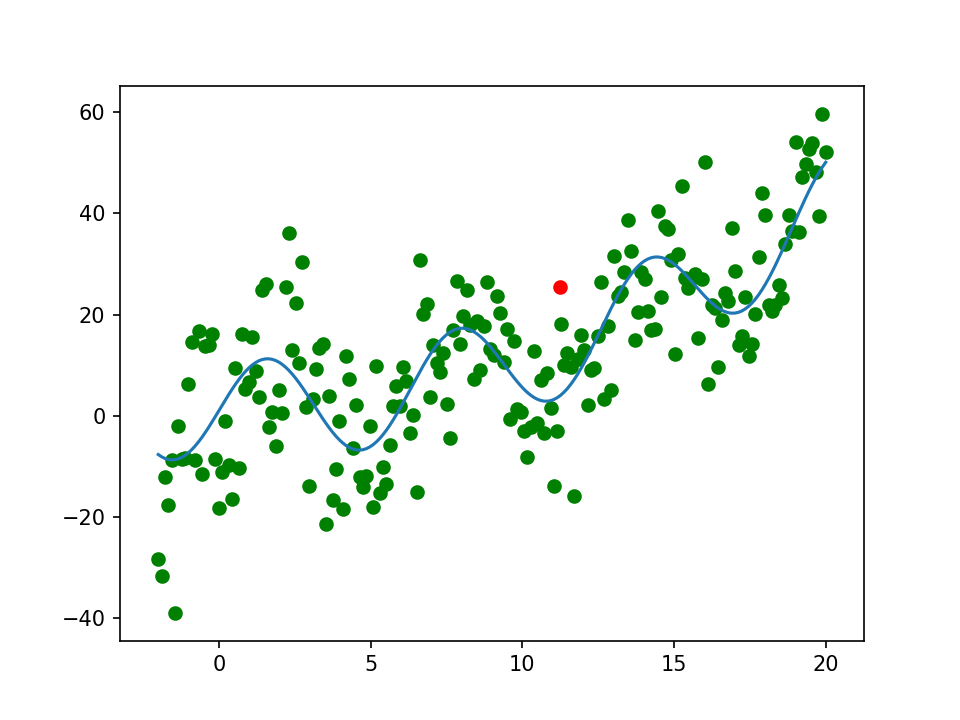

In [41]:
x = linspace(-2,20,200)

f = lambda x: 10*sin(x) + 0.1*x**2 +1
figure(2)
plot(x, f(x))

data = loadtxt('data2.txt')
data = data.T
xnoise = data[0]
ynoise = data[1]
scatter(xnoise,ynoise, color = 'green')

xcord = []
ycord = []
for i in range(len(xnoise)):
    if 7<xnoise[i]<14 and 18<ynoise[i]<50:
        xcord.append(xnoise[i])
        ycord.append(ynoise[i])
        
xave = average(xcord)
yave = average(ycord)

plot(xave,yave,'ro')

**Part 3:**
1. Create an image plot of the 3D function $$ z(x,y) = \sin(x^2)\cos(y^3)$$ in the $x$ interval $[0,3.]$ and $y$ interval $[0,5.5]$ and use 500 data points for the plot in each direction. 
2. Make a line plot of $ z(x,y)$ along the diagonal from the lower left to the top right of the plot, i.e. along the line that connects the points $(0,0)$ and $(3.,5.5)$.

<IPython.core.display.Javascript object>


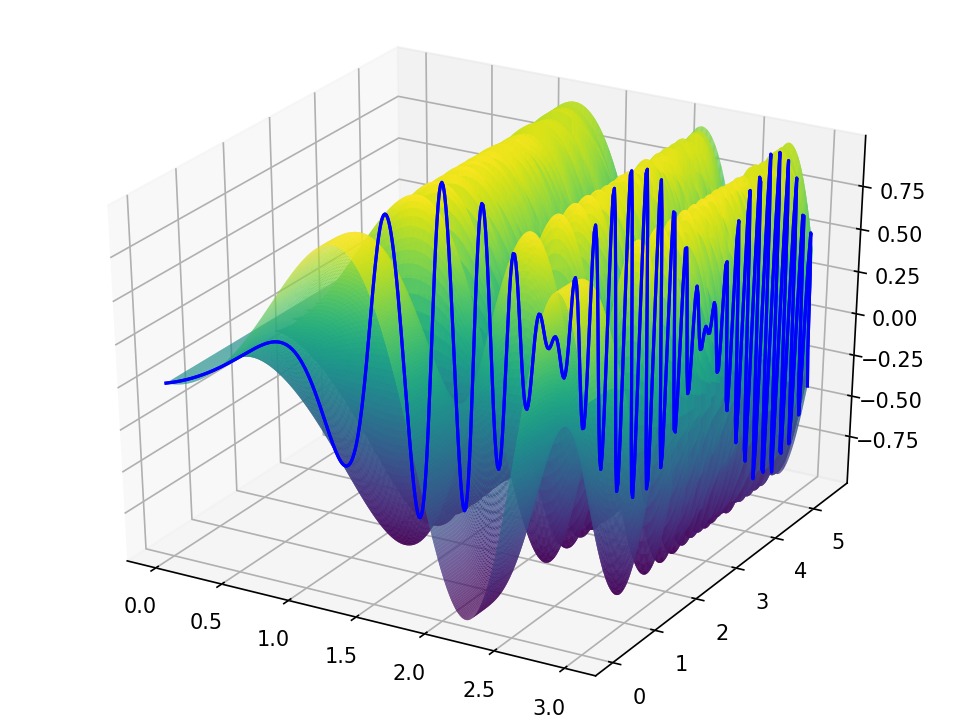

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

n = 500
x=linspace(0.,3.,n)
y=linspace(0.,5.5,n)
xv,yv = meshgrid(x,y)
z=sin(xv**2)*cos(yv**3)
fig = plt.figure(3)
ax = Axes3D(fig)
ax.plot_surface(xv,yv,z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

In [44]:
z = lambda x, y: sin(x**2)*cos(y**3)
ax.plot3D(x,y,z(x,y), 'b')

## Problem 2
 The [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), also known as the predator–prey equations, represent a model for an interacting predator and a prey population:
 
 $$ \frac{dx}{dt} = \alpha x - \beta x y$$ 
 
 $$\frac{dy}{dt} = \delta xy -\gamma y$$ 
 
 where:
 * $x$ number of prey
 * $y$ number of predetors
 * and $\alpha$, $\beta$, $\delta$ and $\gamma$ are parameters that describe the interaction between the two species.
 
1. Write a program to implement a solution to the  Lotka–Volterra equations equations.
2. Create a plot with the evolution of prey and predetor populations vs time, for the parameters $\alpha=2/3$, $\beta=4/3$, $\delta=1$ and $\gamma=1/2$ for the time interval $[0,35]$ for initial conditions $(x,y) = (0.2, 0.5)$.

In [59]:
def LotVolt(a, b, d, g, x, y, dt, interval):
    xlist = []
    ylist = []
    tlist = []
    t = 0
    while t < interval:
        deltax = (a*x - b*x*y)*dt
        #print(deltax)
        x = x + deltax
        deltay = (d*x*y - g*y)*dt
        #print(deltay)
        y = y + deltay
        t = t + dt
        xlist.append(x)
        ylist.append(y)
        tlist.append(t)
    lotvolt = [xlist, ylist, tlist]
    return lotvolt

In [65]:
prey = LotVolt(2/3, 4/3, 1., 1/2, 0.2, 0.5, 0.1, 35)[0]
pred = LotVolt(2/3, 4/3, 1., 1/2, 0.2, 0.5, 0.1, 35)[1]
time = LotVolt(2/3, 4/3, 1., 1/2, 0.2, 0.5, 0.1, 35)[2]

close()
figure(4)
plot(time, prey, label = 'Prey')
plot(time, pred, label = 'Predator')
legend(loc = 'upper left')
xlabel('time')
ylabel('population')
show()

<IPython.core.display.Javascript object>

## Problem 3 

**Part 1:** Use the sympy libraries to compute the first and second derivatives of $$f(x) = \sin(\cos(x))$$ and print them to the screen, using Sympy's `pprint` command. 
 

In [70]:
import sympy as sp

x = sp.Symbol('x')

sp.pprint(sp.diff(sp.sin(sp.cos(x))))

sp.pprint(sp.diff(sp.sin(sp.cos(x))).diff())

-sin(x)⋅cos(cos(x))
     2                                    
- sin (x)⋅sin(cos(x)) - cos(x)⋅cos(cos(x))


**Part 2:** Find all the solutions $0 \leq x \leq 2\pi$ to the equation $$f'(x) = f(x)$$ with $f$ from part (1).

In [83]:
soln = sp.solveset(f-fp,x, sp.Interval(0,2*pi))
print(soln)

ConditionSet(x, Eq(sin(x)*cos(cos(x)) + sin(cos(x)), 0), Interval(0, 6.28318530717959))


In [80]:
f = sp.sin(sp.cos(x))
fp = f.diff(x)
solns = sp.solve([x >= 0, x <= 2*pi, f - fp], x)

print(solns)

TypeError: 'ConditionSet' object is not iterable

**Part 3:** Compute the integral $$ \int_0^1 \cos(x) x^x dx $$
 

In [93]:
import scipy.integrate as sci
import scipy as sc

func = lambda x: sc.cos(x)*x**x
sci.quad(func, 0, 1)[0]

0.6514836174937078

**Part 4**: Consider the matrix-valued function $$M(\theta) = \pmatrix{ \cos \theta & -\sin \theta \cr \sin \theta & \cos \theta }$$
and use Sympy to verify the matrix equation
$$M(\theta + \phi) = M(\theta) \cdot M(\phi)$$

In [94]:
th, ph = sp.symbols('theta phi')

In [108]:
r = sp.Symbol('r')

def M(r):
    return matrix([[sp.cos(r), -sp.sin(r)], [sp.sin(r), sp.cos(r)]])


matrix([[cos(theta), -sin(theta)],
        [sin(theta), cos(theta)]], dtype=object)

In [114]:
a = M(th+ph)
b = M(th)*M(ph)
sp.simplify(a - b) #since one - the other = 0, proves they're equal.
#sp.solve(M(th+ph) - M(th)*M(ph))

[[0, 0], [0, 0]]